**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import necessary libraries for data processing to modelling

## Load Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Musoloo/Data-Mining-Week-1_Benito-Priyasha/refs/heads/main/Bank.csv', delimiter=';')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
973,37,technician,single,secondary,no,5436,yes,no,cellular,6,may,7,11,351,1,failure,no
3858,37,admin.,married,secondary,no,-107,yes,no,unknown,28,may,158,2,-1,0,unknown,no
4137,59,unknown,married,unknown,no,3940,no,no,unknown,5,jun,48,2,-1,0,unknown,no
602,50,blue-collar,married,primary,no,12519,yes,no,cellular,17,apr,146,2,147,4,success,no
3786,74,retired,married,secondary,no,921,no,no,telephone,17,apr,394,2,-1,0,unknown,yes
3754,36,management,single,tertiary,no,2944,no,no,cellular,18,aug,882,8,-1,0,unknown,yes
2857,25,services,single,secondary,no,368,no,no,telephone,25,jul,168,1,-1,0,unknown,no
114,25,student,single,secondary,no,331,no,no,telephone,26,aug,170,4,-1,0,unknown,yes
2119,31,unemployed,married,tertiary,no,591,no,no,cellular,21,nov,161,2,-1,0,unknown,no
2550,41,management,married,tertiary,no,251,no,yes,unknown,6,jun,85,3,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [4]:
# 2. Display the info column
df.info()

# This is used to check datatype for each columns, as well as how many non-null values, and how many entries are in the dataset.
# There is a total of 4521 non-null entries across all columns, with some datatypes being objects (string), and some other being numerical values (int).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# 3. Display the describe column
df.describe()

# This is used to display the numerical values of each numerical attributes, starting from rows count, average, standard deviation, each quartile, and lastly minimum and maximum value.
# We can see that balance is the entity with the highest range (seen from the standard deviation and highest maximum value)
# On the other hand, previous has the smallest range between them all.

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# 4. Unique values count for categorical column (in this case target column "y")
print(df['y'].value_counts(dropna=False))

# The dataset has more outcomes of B (almost 8x the M value)

y
no     4000
yes     521
Name: count, dtype: int64


In [7]:
# checking unknown values

for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")

# We can see that there are a lot of unknown values in the dataset, but since in my X I don't use any of these, there is no need to replace or drop the rows or columns with 'unknown'.

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [8]:
# 6. Replacing unidentified values ('unknown')
df['job'] = df['job'].replace('admin.', 'management')

df.sample(10)
# Based on the heatmap below, contact will be used, so I will replace the unknown with the mode.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3948,51,management,single,tertiary,yes,-55,yes,no,cellular,18,aug,119,6,-1,0,unknown,no
3973,25,technician,single,secondary,no,959,no,no,cellular,9,jul,144,5,-1,0,unknown,no
4203,37,management,married,tertiary,no,1689,yes,no,unknown,29,may,645,2,-1,0,unknown,no
3056,23,services,single,secondary,no,500,yes,no,unknown,4,jun,111,3,-1,0,unknown,no
3203,32,blue-collar,married,secondary,no,3514,yes,no,unknown,20,may,226,2,-1,0,unknown,no
1662,50,blue-collar,married,primary,no,1164,yes,no,unknown,8,may,166,2,-1,0,unknown,no
197,38,services,married,secondary,no,1,no,yes,cellular,21,nov,152,2,-1,0,unknown,no
3176,28,management,single,secondary,no,4745,no,no,telephone,12,may,360,1,181,5,success,yes
343,41,self-employed,single,tertiary,no,3950,yes,no,unknown,30,may,96,2,-1,0,unknown,no
3404,25,self-employed,single,tertiary,no,453,yes,no,cellular,17,jul,134,1,-1,0,unknown,no


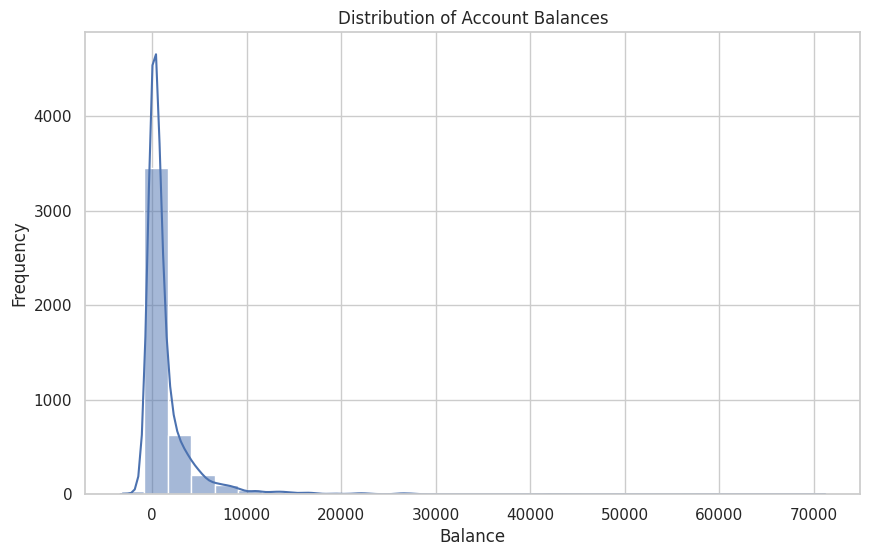

In [10]:
sns.set(style="whitegrid")

# Histogram of the balance column
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Distribution of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [11]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.sample(n = 5)

# Data encoding to change the categorical values into int.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
57,33,5,2,2,0,2155,0,0,0,17,9,295,1,-1,0,3,0
3904,32,3,1,1,0,76,1,0,2,21,8,189,2,-1,0,3,0
4181,26,8,2,1,0,1275,1,0,2,20,6,18,9,-1,0,3,0
3018,57,5,1,1,0,35,0,1,2,26,6,215,3,-1,0,3,0
2832,36,3,1,2,0,1582,0,0,1,3,3,26,2,197,1,0,0


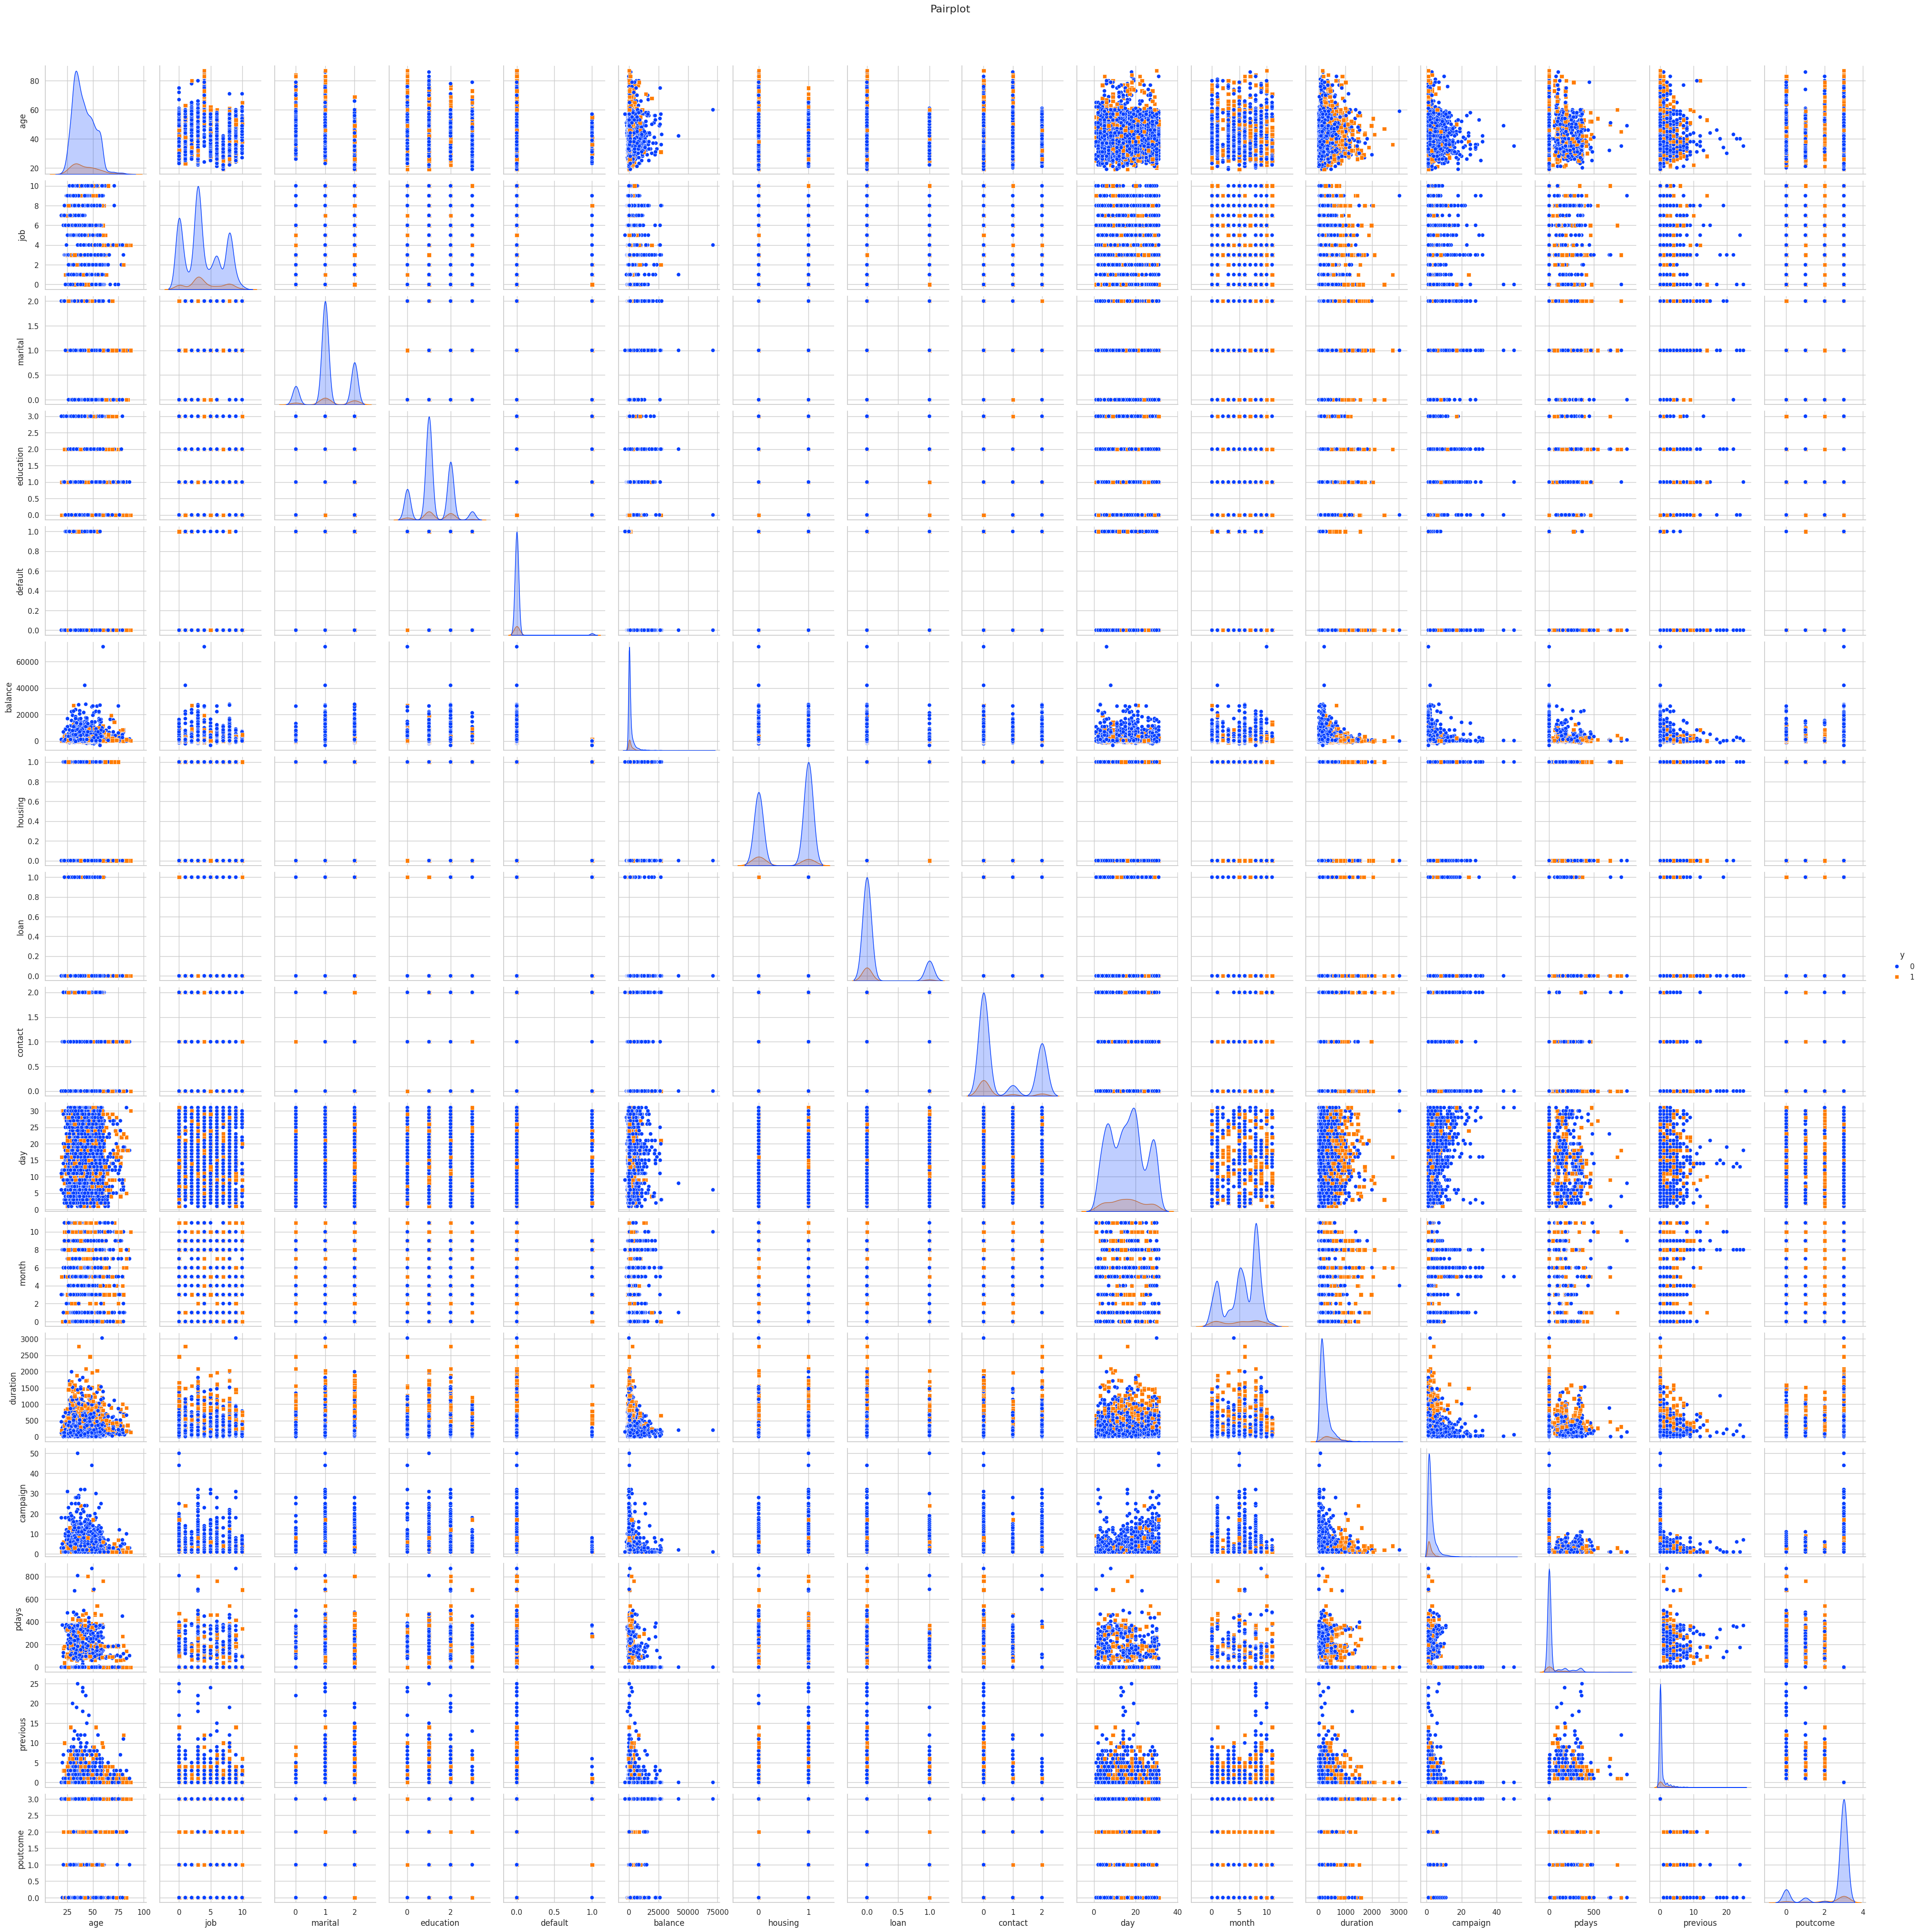

In [12]:

sns.pairplot(df, hue='y', palette='bright', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot', y=1.02, fontsize=16)
plt.show()

# The markers differentiate the 'y' value, 0 being no and 1 being yes.
# We can see that in the duration pairplots, the orange dots tend to be in the higher levels of the duration.
# Many of the variables are not actually affecting the 'y' target that significantly.

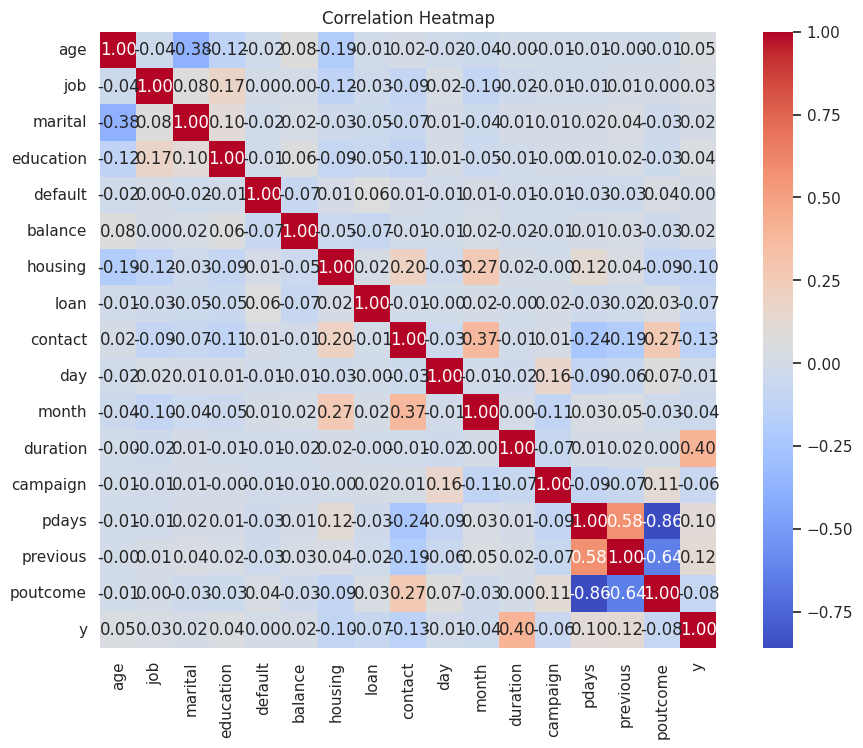

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Machine Learning (Split Data)

In [15]:
# Defining X and y, and dropping unnecessary columns
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']


In [16]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

# SMOTEEN combines SMOTE with an undersampling technique called Edited Nearest Neighbors (ENN).

Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


In [17]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 80% to train and 20% to test

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# a. Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Model fitting
rf_classifier.fit(X_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [19]:
# b. Predicting the test set results
y_pred_rf = rf_classifier.predict(X_test)

# c. Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9942418426103646


In [20]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# We can conclude that the model is well-fitted because the margin is below 1%

Testing accuracy: 0.9942
Training accuracy: 1.0000


In [21]:
# d. Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)
# showing that only 6 of the data are false positives or false negatives.


Confusion Matrix Random Forest:
[[581   6]
 [  0 455]]


In [22]:
# e. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# a. Defining the model
gb_model = GradientBoostingClassifier(random_state=42)

# Model fitting
gb_model.fit(X_train, y_train)

# b. Predicting the test set
y_pred = gb_model.predict(X_test)

# c. Checking accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
# The accuracy of this Gradient Boosting Model is 97.9%,it means that there is very small margins of errors.

Accuracy: 0.9788867562380038


In [25]:
# d. Confusion Matrix
cm_xg = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xg)

# Confusion matrix of XGBoost, showing that 22 predictions were wrong out of 1000+.


Confusion Matrix XGBoost:
[[570  17]
 [  5 450]]


In [26]:
# e. Classification Report
class_report_xg = classification_report(y_test, y_pred)

print("Classification Report Gradient Boosting: \n", class_report_xg)
# Classification report of Gradient Boosting Model.

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



In [27]:
# f. Conclusion
# Comparing the two models, it’s clear that Random Forest performs better, achieving over 99% accuracy in predicting both 'yes' and 'no' values.
# Gradient Boosting, however, is still a strong alternative, and evaluating both models on future datasets could be valuable.
# The use of SMOTEEN notably improves model performance by addressing class imbalances.
# Additionally, using only around three variables simplifies predictions, demonstrating that effective data exploration can lead to strong results.
